---

# Combined features Based Classification

---


In [1]:
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt

2025-04-12 22:35:57.134786: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-12 22:35:57.149784: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744490157.161293    4413 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744490157.164747    4413 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744490157.173588    4413 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

## Load dataset

In [2]:
Xa = np.load('../dataset/counts.npy')
Xb = np.load('../dataset/slopes.npy')
Xc = np.load('../dataset/stds.npy')
y = np.load('../dataset/labels.npy')
classes = np.load('../dataset/mappings.npy')

In [3]:
X = np.stack((Xa, Xb, Xc), axis=-1)

In [4]:
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (36262, 73, 3)
y shape: (36262, 40)


## Train-test split

In [5]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Model

In [6]:
x_input = keras.layers.Input(shape=(X.shape[1], X.shape[2]))

In [7]:
x = keras.layers.Conv1D(32, 5, activation='relu', padding='same')(x_input)
x = keras.layers.Conv1D(64, 5, activation='relu', padding='same')(x)
x = keras.layers.MaxPooling1D(pool_size=2)(x)
x = keras.layers.Dropout(0.25)(x)

x = keras.layers.Conv1D(32, 5, activation='relu', padding='same')(x_input)
x = keras.layers.Conv1D(64, 5, activation='relu', padding='same')(x)
x = keras.layers.MaxPooling1D(pool_size=2)(x)
x = keras.layers.Dropout(0.25)(x)

x = keras.layers.Conv1D(128, 3, activation='relu', padding='same')(x)
x = keras.layers.Conv1D(128, 3, activation='relu', padding='same')(x)
x = keras.layers.MaxPooling1D(pool_size=2)(x)
x = keras.layers.Dropout(0.25)(x)

2025-04-12 22:36:03.646759: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (100)


In [8]:
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dropout(0.25)(x)
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dropout(0.25)(x)
x = keras.layers.Dense(64, activation='relu')(x)

In [9]:
output = keras.layers.Dense(y.shape[1], activation='softmax')(x)

model = keras.models.Model(inputs=x_input, outputs=output)

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 73, 3)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 73, 32)         │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 73, 64)         │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 36, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 36, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 36, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 18, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 18, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 40)             │         2,600 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 718,632 (2.74 MB)

 Trainable params: 718,632 (2.74 MB)

 Non-trainable params: 0 (0.00 B)

## Train

In [18]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)

Epoch 1/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8450 - loss: 0.4833 - val_accuracy: 0.7764 - val_loss: 0.7643
Epoch 2/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8458 - loss: 0.4849 - val_accuracy: 0.7700 - val_loss: 0.7867
Epoch 3/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8465 - loss: 0.4745 - val_accuracy: 0.7783 - val_loss: 0.7553
Epoch 4/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8493 - loss: 0.4610 - val_accuracy: 0.7722 - val_loss: 0.7949
Epoch 5/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8485 - loss: 0.4704 - val_accuracy: 0.7796 - val_loss: 0.7781
Epoch 6/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8466 - loss: 0.4708 - val_accuracy: 0.7785 - val_loss: 0.7890
Epoch 7/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8498 - loss: 0.4669 - val_accuracy: 0.7818 - val_loss: 0.7857
Epoch 8/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8551 - loss: 0.4554 - val_accuracy: 0.

In [19]:
# Save the model
model.save('../models/combined_model.keras')

## Test

In [20]:
# Load the arohana-avarohana model
model = keras.models.load_model('../models/combined_model.keras')

In [21]:
loss, accuracy = model.evaluate(X_test, y_test)

170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7858 - loss: 0.8049


In [22]:
print(f'Test accuracy: {round(accuracy * 100, 2)}')

Test accuracy: 78.46


In [23]:
y_pred = model.predict(X_test)

170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [24]:
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='macro')
print(f'f1 score: {round(f1, 2)}')

f1 score: 0.78


In [25]:
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

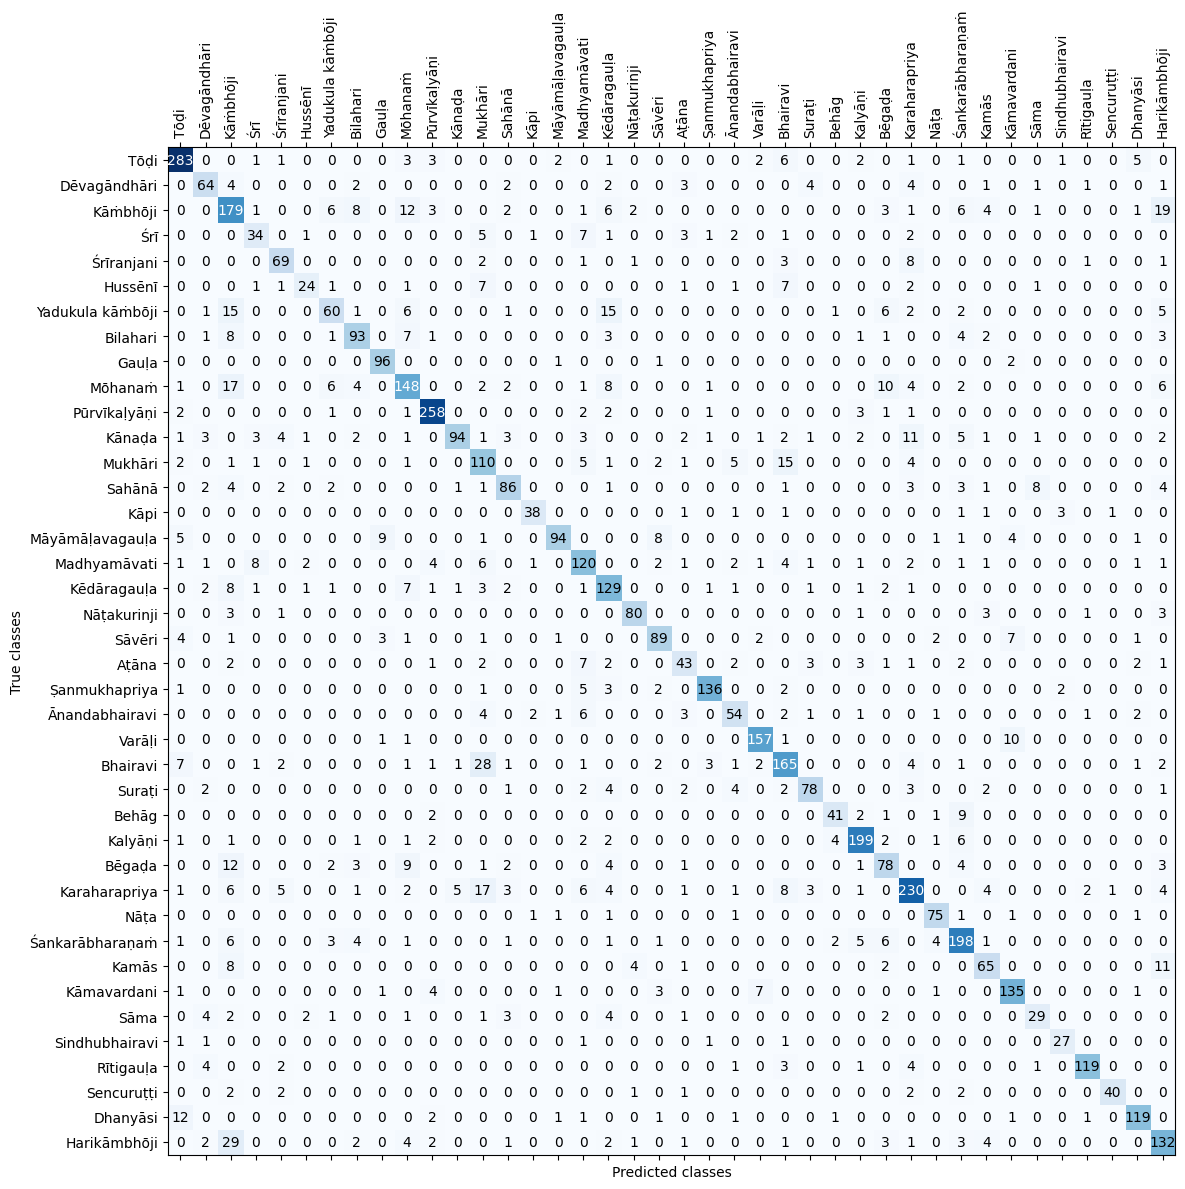

In [26]:
fig, ax = plt.subplots(figsize=(12, 12))
cax = ax.matshow(cm, cmap=plt.cm.Blues)

ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes, rotation=90)
ax.set_yticklabels(classes)

ax.set_xlabel('Predicted classes')
ax.set_ylabel('True classes')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        color = 'black' if cm[i, j] < max(cm.flatten()) / 2 else 'white'
        ax.text(j, i, cm[i, j], ha='center', va='center', color=color)

plt.savefig('../plots/confusion_matrix_combined.png', dpi=300)
plt.tight_layout()
plt.show()

170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
                  precision    recall  f1-score   support

            Tōḍi       0.87      0.91      0.89       312
    Dēvagāndhāri       0.74      0.72      0.73        89
        Kāṁbhōji       0.58      0.70      0.64       255
             Śrī       0.67      0.59      0.62        58
      Śrīranjani       0.78      0.80      0.79        86
         Hussēnī       0.75      0.51      0.61        47
Yadukula kāṁbōji       0.71      0.52      0.60       115
        Bilahari       0.77      0.74      0.76       125
           Gauḷa       0.87      0.96      0.91       100
         Mōhanaṁ       0.71      0.70      0.70       212
    Pūrvīkaḷyāṇi       0.91      0.95      0.93       272
          Kānaḍa       0.92      0.65      0.76       145
         Mukhāri       0.57      0.74      0.64       149
          Sahānā       0.78      0.72      0.75       119
            Kāpi       0.88      0.81      0.84        47
 Māyāmāḷavagauḷa       0.92   

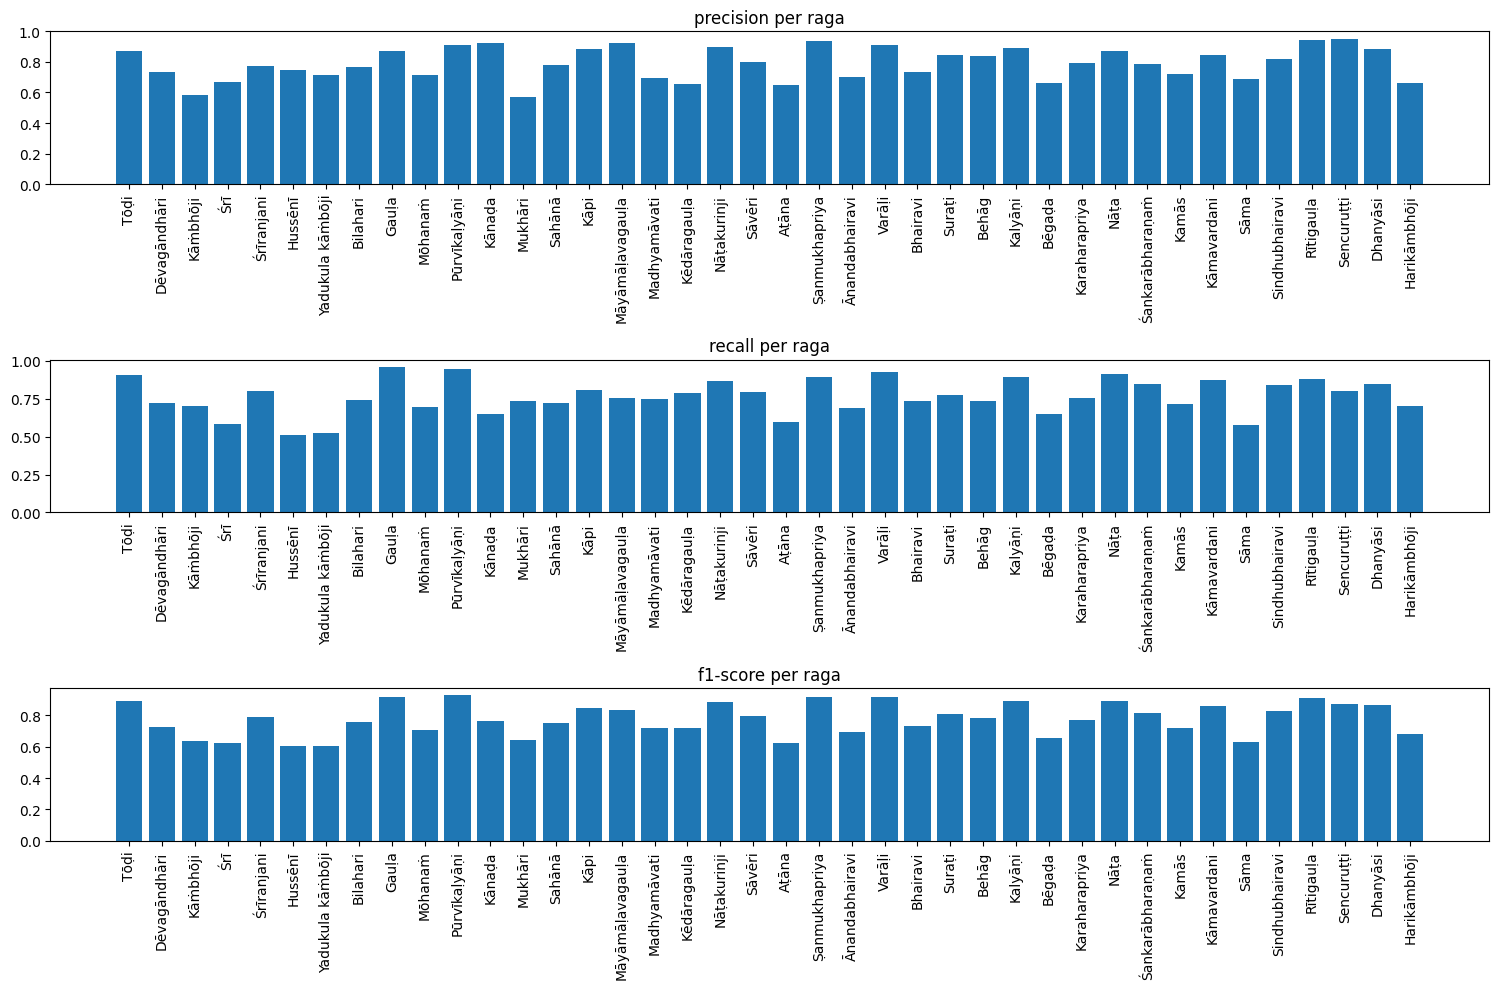

In [27]:
from sklearn.metrics import classification_report

# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=classes, output_dict=True)
print(classification_report(y_true_classes, y_pred_classes, target_names=classes))

# Plot precision, recall and f1-score for each class
metrics = ['precision', 'recall', 'f1-score']
plt.figure(figsize=(15, 10))
for i, metric in enumerate(metrics):
    plt.subplot(3, 1, i+1)
    values = [report[raga][metric] for raga in classes]
    plt.bar(classes, values)
    plt.title(f'{metric} per raga')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('../plots/metrics_per_class.png', dpi=300)
plt.show()